In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the csv data to a Pandas DataFrame
women_data = pd.read_csv('Data/women/combined_data.csv')

In [3]:
# Making new column for Total with adding all from column 5 to end
women_data['Total'] = women_data.iloc[:, 5:].sum(axis=1)
# Make the spatial datas column State/ut all capital
women_data['STATE/UT'] = women_data['STATE/UT'].str.title()
# Make the state/ut column all capital
women_data['STATE/UT'] = women_data['STATE/UT'].str.upper()

In [4]:
# Processing the data adding all the values in the Victims_Total column and grouping by year
year_wise = women_data.groupby('Year')['Total'].sum()
state_wise = women_data.groupby('STATE/UT')['Total'].sum().sort_values()
state_wise_other = state_wise.sort_values(ascending=False)
others = state_wise_other[state_wise_other/state_wise_other.sum() < 0.025].sum()
state_wise_other = state_wise_other[state_wise_other/state_wise_other.sum() >= 0.025]
state_wise_other['Others'] = others

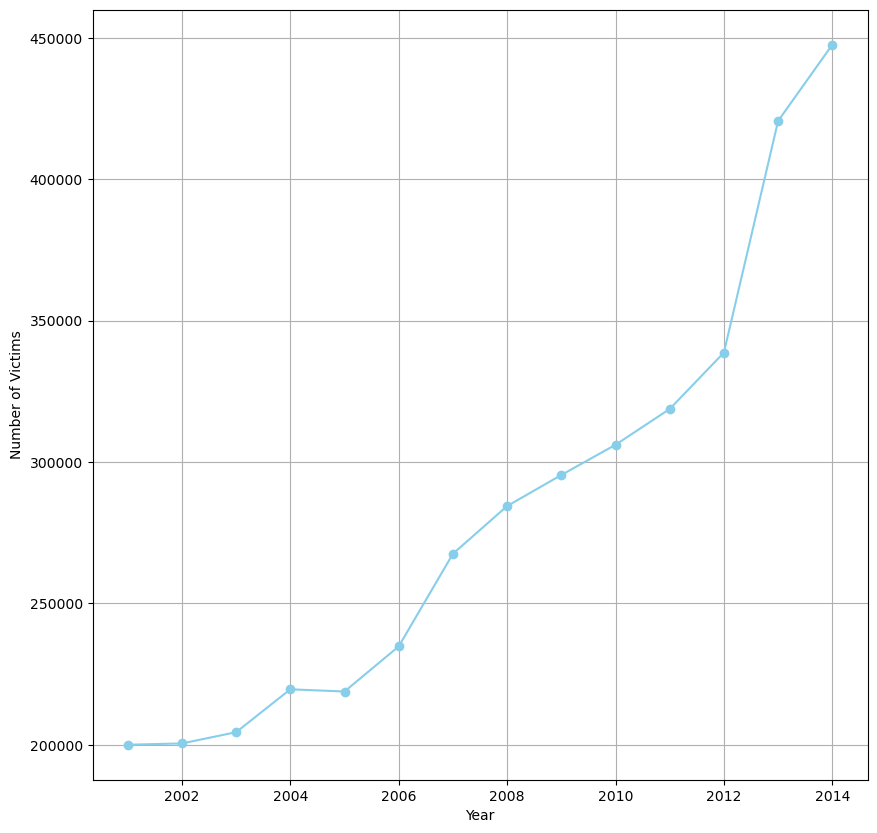

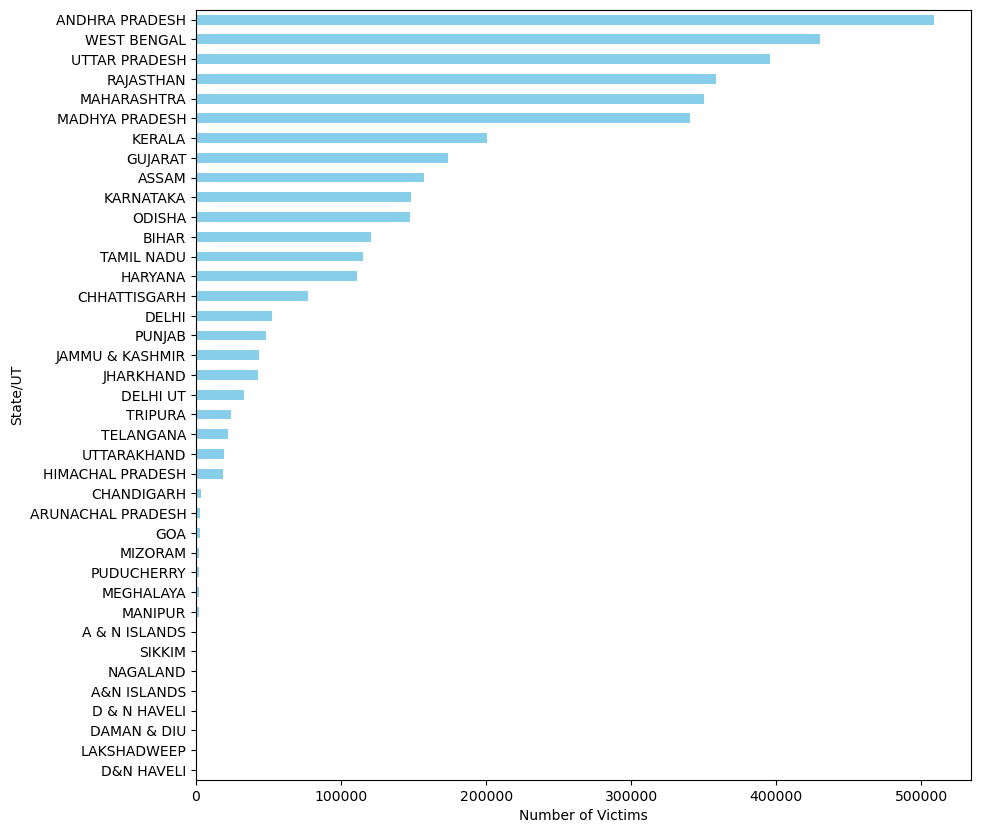

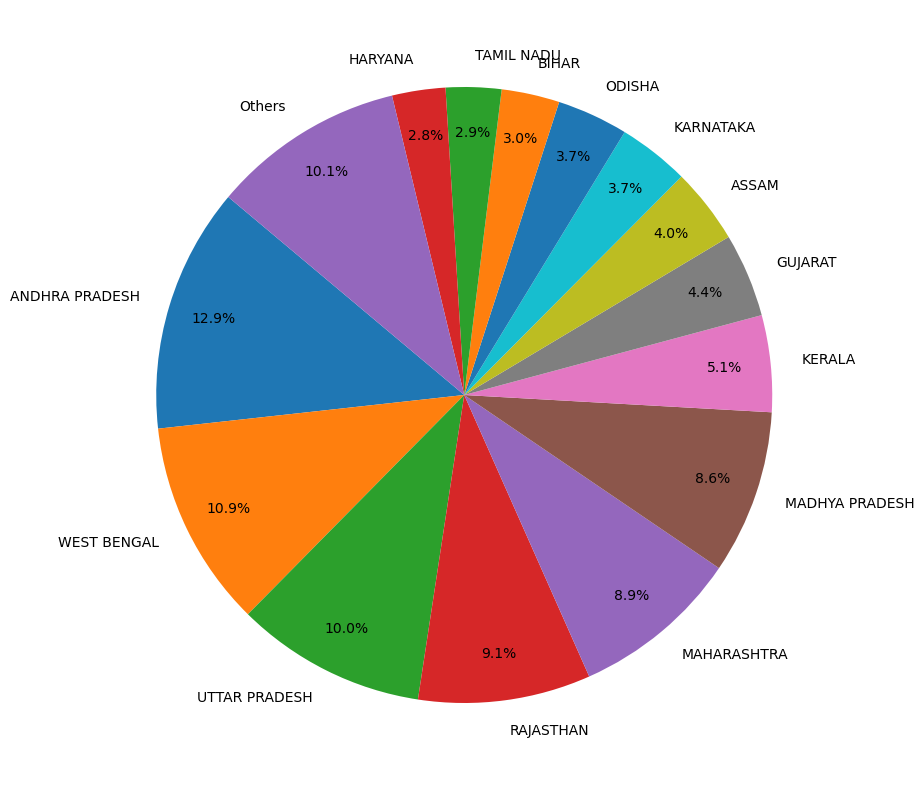

In [5]:
# plotting the data points in 2D
plt.figure(figsize=(10,10))
year_wise.plot(kind='line',marker='o',color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
state_wise.plot(kind='barh',color='skyblue')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

plt.figure(figsize=(10,10))
state_wise_other.plot(kind='pie',autopct='%1.1f%%',startangle=140,pctdistance=0.85)
plt.ylabel('')
plt.show()

In [6]:
# Making a new column 'Yearly_Total' by summing all columns for each year
yearly_totals = women_data.groupby('Year').sum(numeric_only=True)

       Rape  Kidnapping and Abduction  Dowry Deaths  \
Year                                                  
2001  32150                     29290         13702   
2002  32746                     29012         13644   
2003  31694                     26592         12416   
2004  36466                     31156         14052   
2005  36718                     31500         13574   

      Assault on women with intent to outrage her modesty  \
Year                                                        
2001                                              68248     
2002                                              67886     
2003                                              65878     
2004                                              69134     
2005                                              68350     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
Year                                                                    
2001                       19492        

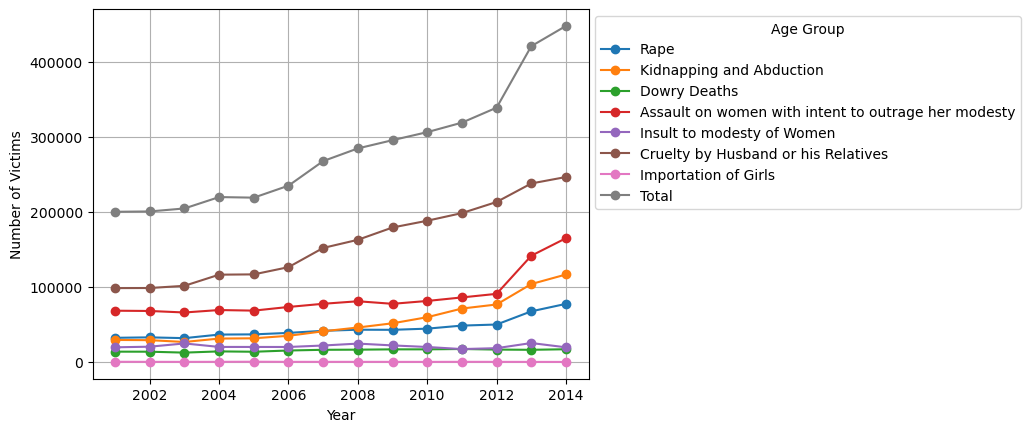

In [7]:
# print(yearly_totals.head())
yearly_totals.plot(kind='line',marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
plt.show()

Summary Statistics:
               Year          Rape  Kidnapping and Abduction  Dowry Deaths  \
count  10677.000000  10677.000000              10677.000000  10677.000000   
mean    2007.697949     58.353845                 70.062190     20.182261   
std        4.046874    216.313600                313.186659     98.277980   
min     2001.000000      0.000000                  0.000000      0.000000   
25%     2004.000000      8.000000                  6.000000      1.000000   
50%     2008.000000     22.000000                 20.000000      5.000000   
75%     2011.000000     45.000000                 49.000000     16.000000   
max     2014.000000   5076.000000              10626.000000   2469.000000   

       Assault on women with intent to outrage her modesty  \
count                                       10677.000000     
mean                                          113.572164     
std                                           459.112686     
min                                   

<Figure size 1000x600 with 0 Axes>

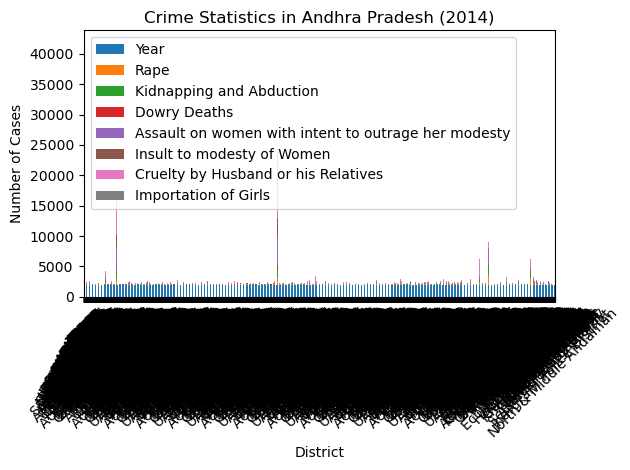

Total Cases per Category:
Rape                                                    623044
Kidnapping and Abduction                                748054
Dowry Deaths                                            215486
Assault on women with intent to outrage her modesty    1212610
Insult to modesty of Women                              292762
Cruelty by Husband or his Relatives                    2234460
dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Data/women/combined_data.csv')

df = pd.DataFrame(data)

# Perform basic statistical analysis
summary_stats = df.describe()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

# Visualization
plt.figure(figsize=(10, 6))
df.plot(x='DISTRICT', kind='bar', stacked=True, 
        title='Crime Statistics in Andhra Pradesh (2014)', 
        ylabel='Number of Cases', 
        xlabel='District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Further analysis (example: total cases per category)
total_cases = df[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 
                   'Assault on women with intent to outrage her modesty', 
                   'Insult to modesty of Women', 
                   'Cruelty by Husband or his Relatives']].sum()

print("Total Cases per Category:")
print(total_cases)
